
Blocking 실험 – 동물 지능에 대한 중요한 실험
	ACQ: [CS1 + CS2 + US] 이후,
	CS1 제시 -> CR,   CS2 제시 -> CR
	
    ACQ: [CS1+US] 이후, (이때는 Naive CS) – 예상치 못한 CS
    
ACQ: [CS1 + CS2 + US] 추가 제시 
CS1 제시 -> CR  
CS2 제시 -> CR? Or No CR?  => 결과는 No CR
 -> No surprise = No learning  
 
도파민 시스템도 surprise stimuli에 대응하는 시스템
Expectation: V_cs VS. Real world: λ (1~ф0) 
ΔV = λ – V_cs  -> 최대 1: λ (1) – CS ф    
놀라는 정도 = 실제 상황 – 기대한 정도    ΔV=λ-∑V_cs 

Asymtote = 최대로 학습한 상태


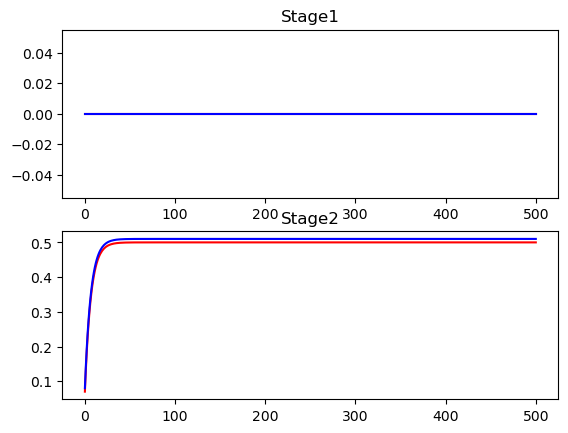

In [9]:
#CS: array that defines presentation of the CSs: - 1 for CS present, 0 for CS absent
#v_CS: array of v value for each CS
#a_CS: array of alpha values for each CS
#v_US: value of the US
#b_US: learning parameter which is dependent on the US

import matplotlib.pyplot as plt
import numpy as np

def RWacq (CS, v_CS, a_CS, v_US, b_US): #v_US 는 람다임
    sum=0                            #sum of Vs
    for i in range(len(CS)):
        sum+=CS[i]*v_CS[i]
    
    for i in range(len(CS)):          #update V
        v_CS[i]+=CS[i]*a_CS[i]*b_US*(v_US-sum)  #ΔV=λ-∑V_cs
        
    return v_CS

#blocking exp
n_trials=500
v_CS=[0,0]  #처음엔 v_CS 0
a_CS=[0.7, 0.7]
v_US=1
b_US=0.1 

# stage 1 simple acq vs no Us  CS1+US
# stage 2 CS! + CS2 + US
# 조건 그룹은 stage1에서 US 없이 CS1만


# Stage 1 simple acquisition vs no US
CS=[0,0]          
result=np.zeros((n_trials, len(CS)))
for i in range(n_trials):
    result[i]=RWacq(CS, v_CS, a_CS, v_US, b_US)

# 3.plot figure 
fig,axs=plt.subplots(2)

axs[0].plot(np.linspace(0,n_trials,n_trials), result[:,0], color='red')   
axs[0].plot(np.linspace(0,n_trials,n_trials), result[:,1],color='blue')   
axs[0].title.set_text('Stage1')
    
#Stage 2 for blocking 
# 2. Run acquisition session and save v values to result array
CS=[1,1]
result=np.zeros((n_trials, len(CS)))
for i in range(n_trials):
    result[i]=RWacq(CS, v_CS, a_CS, v_US, b_US)
    
#PLOT
axs[1].plot(np.linspace(0,n_trials,n_trials), result[:,0], color='red')   
axs[1].plot(np.linspace(0,n_trials,n_trials), result[:,1]+0.01,color='blue') 
axs[1].title.set_text('Stage2')


Conditioned Inhibition

trial 1 CS1+ US
trisl 2 CS1 +CS2

CS1 -> CR 1
CS2 -> No CR
CS1 + CS2 -> CR 1 예상
CS1 + CS2 -> 0 or CR매우작음 실제 동물
  -> CS2가 negative 값을 갖기 때문 = inhibitory
  하지만 실제 실험에서는 negative value를 그냥은 알 수 없기 때문에 
  retardation test (또 다른 learning 상황에서 inhibitory주는 실험) 필요

그래프 제시, 라벨링 철저히, 결과 간단히 설명 - 기대한대로 나왔는지, 실제 연구에 들어 맞는지. parameters 와 assumptions 보여주기

Part 1. Rescorla-Wagner model
choose 3 successes(1,2,10,18 제외) and 2 failures (1,2,5,14,22,23제외) 
   
Earlier models treated each cue independently 
       -> error: No interaction between cues.
       -> RW model solved it

Success 1 6. patterning     discrimination 중 하나

AB가 동시에 주어진 경우에만 학습, An

A+B를 C로 인지하는지 그냥 A와 B로 인지하는지가 궁금하다.
지각 과정에서는 너무 변인이 많아서 이를 컴퓨터 모델로 만드는데는 오래 걸릴 것이다.
성긴 부호화로 따지면 C로 인지하는 것이 아닐까

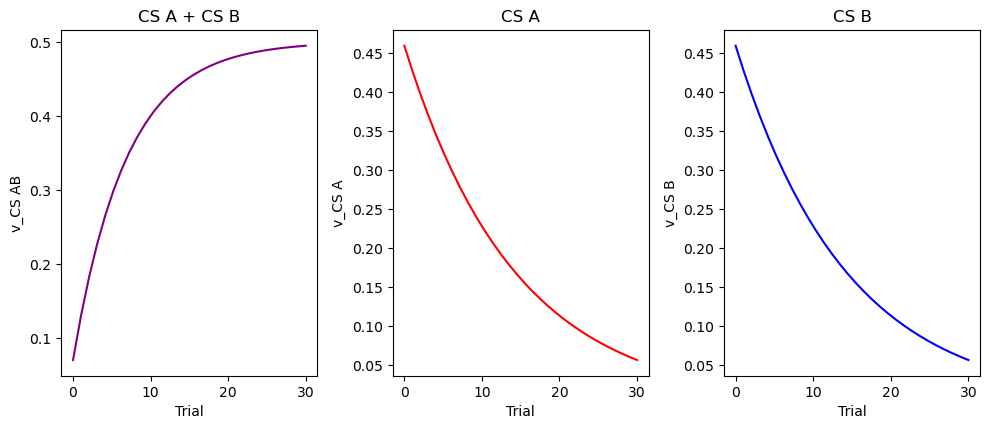

Pattern learning이 CS A와 CS B가 동시에 주어지는 경우, 완전히 새로운 CS C에 대한 학습이라는 가정이다.


In [122]:
import matplotlib.pyplot as plt
import numpy as np

def RWacq(CS, v_CS, a_CS, v_US, b_US):
    sum = 0
    for i in range(len(CS)):
        sum += CS[i] * v_CS[i]
    
    for i in range(len(CS)):
        if CS[0] == 1 and CS[1] == 1:  # CS A와 CS B가 동시에 주어진 경우 US=1
            v_US =1
            v_CS[i] += CS[i] * a_CS[i] * b_US * (v_US - sum)
        else:                           # CS A와 CS B가 동시에 주어지지 않은 경우 US=0
            v_US = 0
            v_CS[i] += CS[i] * a_CS[i] * b_US * (v_US - sum)
    return v_CS

n_trials = 30
v_CS = [0, 0]
a_CS = [0.7, 0.7]
b_US = 0.1

# Training


# CS A와 CS B가 동시에 주어지는 경우
result_train_AB = np.zeros(n_trials)
for i in range(n_trials):
    CS = [1, 1]
    result_train_AB[i] = RWacq(CS, v_CS, a_CS, v_US, b_US)[0]  # v_CS for CS A+B

# CS A만 주어지는 경우
result_train_A = np.zeros(n_trials)
for i in range(n_trials):
    CS = [1, 0]
    result_train_A[i] = RWacq(CS, v_CS, a_CS, v_US, b_US)[0]  # v_CS for CS A

# CS B만 주어지는 경우
result_train_B = np.zeros(n_trials)
for i in range(n_trials):
    CS = [0, 1]
    result_train_B[i] = RWacq(CS, v_CS, a_CS, v_US, b_US)[1]  # v_CS for CS B


# Plotting
plt.figure(figsize=(10, 8))

# Training Plots
plt.subplot(2, 3, 1)
plt.plot(np.linspace(0, n_trials, n_trials), result_train_AB, color='purple')
plt.title('CS A + CS B')
plt.xlabel('Trial')
plt.ylabel('v_CS AB')

plt.subplot(2, 3, 2)
plt.plot(np.linspace(0, n_trials, n_trials), result_train_A, color='red')
plt.title('CS A')
plt.xlabel('Trial')
plt.ylabel('v_CS A')

plt.subplot(2, 3, 3)
plt.plot(np.linspace(0, n_trials,n_trials), result_train_B, color='blue')
plt.title('CS B')
plt.xlabel('Trial')
plt.ylabel('v_CS B')



plt.tight_layout()
plt.show()

print("Pattern learning이 CS A와 CS B가 동시에 주어지는 경우, 완전히 새로운 CS C에 대한 학습이라는 가정이다.")



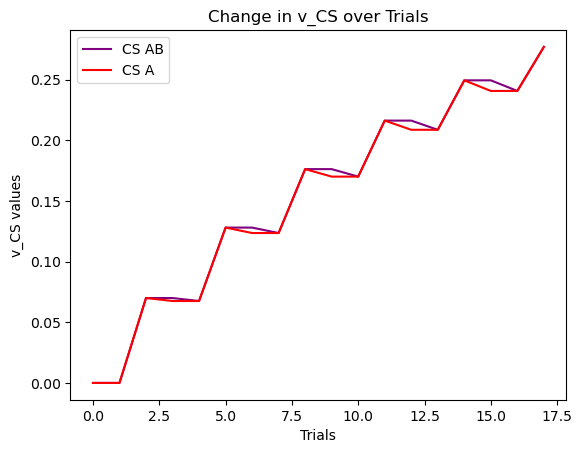

Pattern 학습 시, CS AB의 excitor 효과 + CS A, CS B inhibitor 효과가 번갈아 가며 나올거라는 가정입니다.


In [15]:
import numpy as np
import matplotlib.pyplot as plt

def RWacq (CS, v_CS, a_CS, v_US, b_US): #v_US 는 람다임
    sum=0                            #sum of Vs
    for i in range(len(CS)):
        sum+=CS[i]*v_CS[i]
    
    for i in range(len(CS)):          #update V
        v_CS[i]+=CS[i]*a_CS[i]*b_US*(v_US-sum)  #ΔV=λ-∑V_cs
        
    return v_CS

n_trials = 18
CS = [[1, 1], [1, 0], [0, 1]]
v_CS = [0, 0]  
a_CS = [0.7, 0.7]
v_US = [1, 0, 0]  
b_US = [0.1, 0.05, 0.05]  

# 2. Run acquisition session and save v values to result array
result = np.zeros((n_trials, len(v_CS)))

for i in range(n_trials):
    if i % 3 == 0:  
        result[i] = RWacq(CS[2], v_CS, a_CS, v_US[2], b_US[2])
    elif i % 3 == 1:  
        result[i] = RWacq(CS[1], v_CS, a_CS, v_US[1], b_US[1])
    else:
        result[i] = RWacq(CS[0], v_CS, a_CS, v_US[0], b_US[0])



# Extract v_CS values for each CS type
v_CS_AB = result[:, 0]
v_CS_A = result[:, 1]

# Plotting
x = np.arange(n_trials)

plt.plot(x, v_CS_AB, label='CS AB',color='purple')
plt.plot(x, v_CS_A, label='CS A',color='red')

plt.xlabel('Trials')
plt.ylabel('v_CS values')
plt.title('Change in v_CS over Trials')

plt.legend()
plt.show()
print("Pattern 학습 시, CS AB의 excitor 효과 + CS A, CS B inhibitor 효과가 번갈아 가며 나올거라는 가정입니다.")



Success2 
8.Overshadowing

CS A + CS B + US 가 동시에 주어진다면, CS A 와 CS B 각각의 v_CS는 각각 주어졌을 때 보다 낮게 나온다.

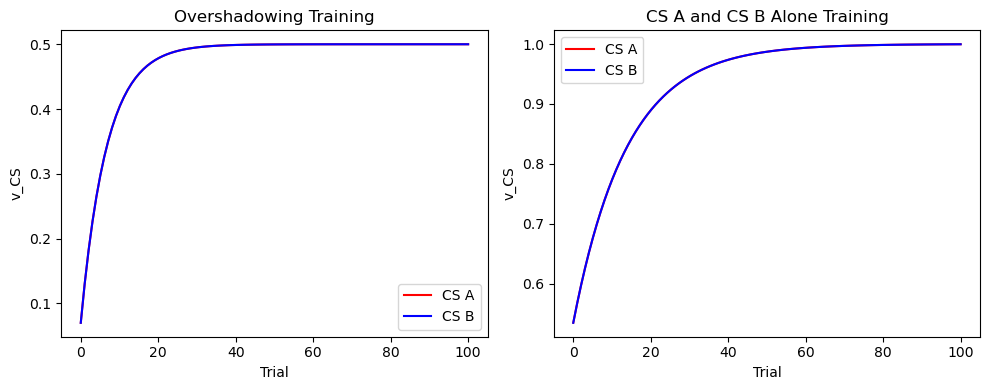

AB동시 학습 시 0.5에서 정체되었던 CSA CSB에 대한 v_CS가,
A,B 각각 따로 학습 시 1까지 증가한다.


In [42]:
import matplotlib.pyplot as plt
import numpy as np

def RWacq(CS, v_CS, a_CS, v_US, b_US):
    sum = 0
    for i in range(len(CS)):
        sum += CS[i] * v_CS[i]
    
    for i in range(len(CS)):
        if CS[i] == 1:  # CS 가 있는 경우에만 v_CS 업데이트
            v_CS[i] += CS[i] * a_CS[i] * b_US * (v_US - sum)
        else:
            v_CS[i] += CS[i] * a_CS[i] * (0 - sum)
    
    return v_CS

# Parameters
n_trials = 100
v_CS = [0, 0]
a_CS = [0.7, 0.7]
v_US = 1
b_US = 0.1

# Training
# CS A and CS B 동시에
CS = [1, 1]  
result_overshadowing = np.zeros((n_trials, len(CS)))
for i in range(n_trials):
    result_overshadowing[i] = RWacq(CS, v_CS, a_CS, v_US, b_US)

# CS A 만
CS = [1, 0]  
result_A = np.zeros((n_trials, len(CS)))
for i in range(n_trials):
    result_A[i] = RWacq(CS, v_CS, a_CS, v_US, b_US)

# # CS B 만
CS = [0, 1]  
result_B = np.zeros((n_trials, len(CS)))
for i in range(n_trials):
    result_B[i] = RWacq(CS, v_CS, a_CS, v_US, b_US)

# Plotting
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(np.linspace(0, n_trials, n_trials), result_overshadowing[:, 0], color='red', label='CS A')
plt.plot(np.linspace(0, n_trials, n_trials), result_overshadowing[:, 1], color='blue', label='CS B')
plt.xlabel('Trial')
plt.ylabel('v_CS')
plt.title('Overshadowing Training')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.linspace(0, n_trials, n_trials), result_A[:, 0], color='red', label='CS A')
plt.plot(np.linspace(0, n_trials, n_trials), result_B[:, 1], color='blue', label='CS B')
plt.xlabel('Trial')
plt.ylabel('v_CS')
plt.title('CS A and CS B Alone Training')
plt.legend()

plt.tight_layout()
plt.show()

print("AB동시 학습 시 0.5에서 정체되었던 CSA CSB에 대한 v_CS가,\nA,B 각각 따로 학습 시 1까지 증가한다.")

Success3  13 Over expectation from two excitor

A, B 각각 학습 -> 1, 이후 AB 동시에 학습 진행하면 A,B각각은 떨어진다. 1 -> 0.5

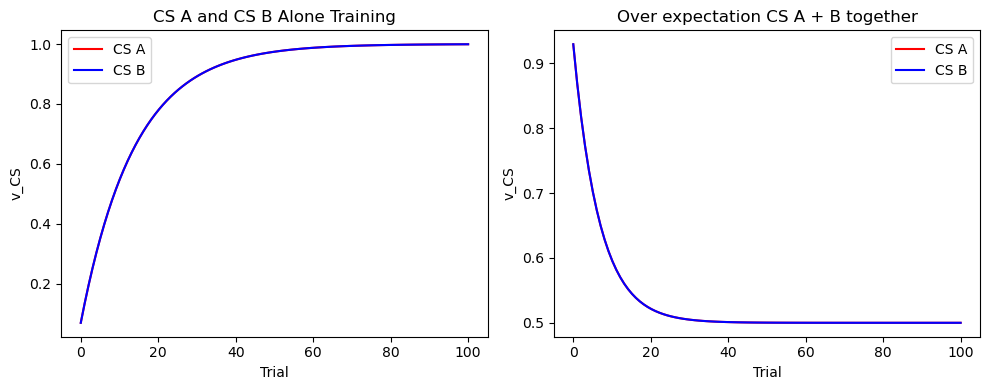

CS A,CS B 를 따로 제시하고 학습한 경우 v_CS가 1까지 증가하였다.
이후 AB를 동시에 제시하여 학습을 진행한 경우 오히려 v_CS가 감소하는
Over expectation 효과가 나타났다.


In [118]:
import matplotlib.pyplot as plt
import numpy as np

def RWacq(CS, v_CS, a_CS, v_US, b_US):
    sum = 0
    for i in range(len(CS)):
        sum += CS[i] * v_CS[i]
    
    for i in range(len(CS)):
        if CS[i] == 1:  # CS 가 있는 경우에만 v_CS 업데이트
            v_CS[i] += CS[i] * a_CS[i] * b_US * (v_US - sum)
        else:
            v_CS[i] += CS[i] * a_CS[i] * (0 - sum)
    
    return v_CS

# Parameters
n_trials = 100
v_CS = [0, 0]
a_CS = [0.7, 0.7]
v_US = 1
b_US = 0.1

# Training


# CS A 만
CS = [1, 0]  
result_A = np.zeros((n_trials, len(CS)))
for i in range(n_trials):
    result_A[i] = RWacq(CS, v_CS, a_CS, v_US, b_US)

# # CS B 만
CS = [0, 1]  
result_B = np.zeros((n_trials, len(CS)))
for i in range(n_trials):
    result_B[i] = RWacq(CS, v_CS, a_CS, v_US, b_US)
    
# CS A and CS B 동시에
CS = [1, 1]  
result_over = np.zeros((n_trials, len(CS)))
for i in range(n_trials):
    result_over[i] = RWacq(CS, v_CS, a_CS, v_US, b_US)

# Plot
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(np.linspace(0, n_trials, n_trials), result_A[:, 0], color='red', label='CS A')
plt.plot(np.linspace(0, n_trials, n_trials), result_B[:, 1], color='blue', label='CS B')
plt.xlabel('Trial')
plt.ylabel('v_CS')
plt.title('CS A and CS B Alone Training')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.linspace(0, n_trials, n_trials), result_over[:, 0], color='red', label='CS A')
plt.plot(np.linspace(0, n_trials, n_trials), result_over[:, 1], color='blue', label='CS B')
plt.xlabel('Trial')
plt.ylabel('v_CS')
plt.title('Over expectation CS A + B together')
plt.legend()


plt.tight_layout()
plt.show()

print("CS A,CS B 를 따로 제시하고 학습한 경우 v_CS가 1까지 증가하였다.\n이후 AB를 동시에 제시하여 학습을 진행한 경우 오히려 v_CS가 감소하는\nOver expectation 효과가 나타났다.")

Failure 1  CS Intensity and US Intensity

알파 값 즉, a_CS 와 b_CS가 바뀌어도 달라지는 것은 v_CS가 특정 값에 도달하는데 걸리는 trial의 횟수 밖에 없다.
원래는 CS강도가 세질수록 UR, CR 모두 커져야한다.
 UR이 a_CS에 의해 증폭되는 경우를 구현 해보았다. 이를 통해 a_CS가 커질 수록 학습속도가 훨씬 빠르게 증가하는 것을 확인할 수 있었다. 


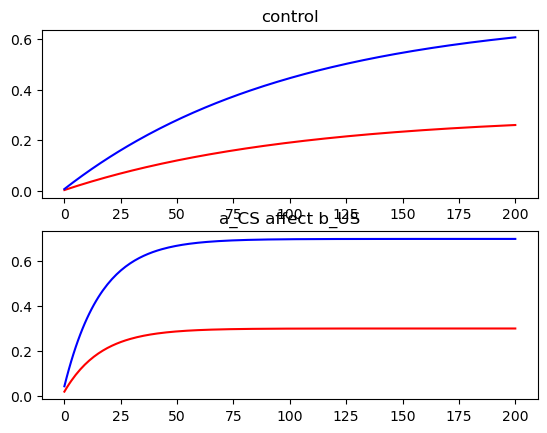

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def RWacq (CS, v_CS, a_CS, v_US, b_US): #v_US 는 람다임
    sum=0                            #sum of Vs
    for i in range(len(CS)):
        sum+=CS[i]*v_CS[i]
    
    for i in range(len(CS)):          #update V
        v_CS[i]+=CS[i]*a_CS[i]*b_US*(v_US-sum)  #ΔV=λ-∑V_cs
        
    return v_CS

n_trials=200
v_CS=[0,0]  #처음엔 v_CS 0
a_CS=[0.3, 0.7]
v_US=1
b_US=0.01


# RW model 
CS=[1,1]          
result1=np.zeros((n_trials, len(CS)))
for i in range(n_trials):
    result1[i]=RWacq(CS, v_CS, a_CS, v_US, b_US)

fig,axs=plt.subplots(2)

axs[0].plot(np.linspace(0,n_trials,n_trials), result1[:,0], color='red')   
axs[0].plot(np.linspace(0,n_trials,n_trials), result1[:,1],color='blue')   
axs[0].title.set_text('control')

n_trials=200
v_CS=[0,0]  #처음엔 v_CS 0
a_CS=[0.3, 0.7]
v_US=1
b_US=0.01

# CS intensity affect US

def RWacq2 (CS, v_CS, a_CS, v_US, b_US): #v_US 는 람다임
    sum=0                        
    for i in range(len(CS)):
        sum+=CS[i]*v_CS[i] 
        b_US += a_CS[i]*0.05
    for i in range(len(CS)):        
        v_CS[i]+=CS[i]*a_CS[i]*b_US*(v_US-sum)  #UR과 CR 개념이 없기 때문에 UR과 CR을 증폭하는 것과 비슷한 효과를 보려면 US를 키우면 될 것이다.
        
    return v_CS
CS=[1,1]          
result2=np.zeros((n_trials, len(CS)))
for i in range(n_trials):
    result2[i]=RWacq2(CS, v_CS, a_CS, v_US, b_US)


print("알파 값 즉, a_CS 와 b_CS가 바뀌어도 달라지는 것은 v_CS가 특정 값에 도달하는데 걸리는 trial의 횟수 밖에 없다.\n원래는 CS강도가 세질수록 UR, CR 모두 커져야한다.\n UR이 a_CS에 의해 증폭되는 경우를 구현 해보았다. 이를 통해 a_CS가 커질 수록 학습속도가 훨씬 빠르게 증가하는 것을 확인할 수 있었다. ")
axs[1].plot(np.linspace(0,n_trials,n_trials), result2[:,0], color='red')   
axs[1].plot(np.linspace(0,n_trials,n_trials), result2[:,1],color='blue')   
axs[1].title.set_text('a_CS affect b_US')
plt.show()

Failure 2  Second order conditioning

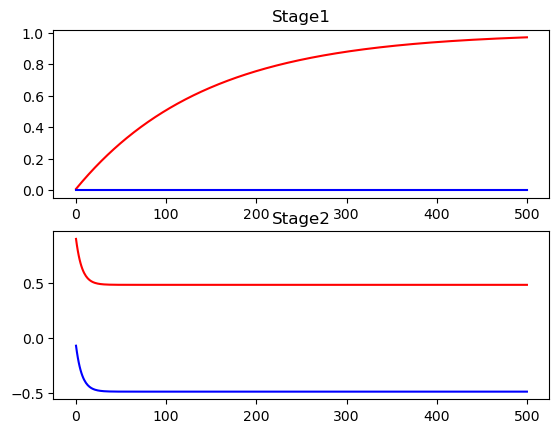

sum의 값이 커진 상태로 v_US=0 이라서 CS B의 v_CS 값은 오히려 감소하였으며 
secondary conditioning을 일으 킬 방법이 없다.


In [129]:
import matplotlib.pyplot as plt
import numpy as np

def RWacq (CS, v_CS, a_CS, v_US, b_US): #v_US 는 람다임
    sum=0                            #sum of Vs
    for i in range(len(CS)):
        sum+=CS[i]*v_CS[i]
    
    for i in range(len(CS)):          #update V
        v_CS[i]+=CS[i]*a_CS[i]*b_US*(v_US-sum)  #ΔV=λ-∑V_cs
        
    return v_CS

n_trials=500
v_CS=[0,0]  #처음엔 v_CS 0
a_CS=[0.7, 0.7]
v_US=1
b_US=0.01


# Stage 1  first conditioning
CS=[1,0]          
result1=np.zeros((n_trials, len(CS)))
for i in range(n_trials):
    result1[i]=RWacq(CS, v_CS, a_CS, v_US, b_US)

# stage 2 second conditioning
v_US=0
b_US=0.1
CS=[1,1]          
result2=np.zeros((n_trials, len(CS)))
for i in range(n_trials):
    result2[i]=RWacq(CS, v_CS, a_CS, v_US, b_US)

# 3.plot figure 
fig,axs=plt.subplots(2)

axs[0].plot(np.linspace(0,n_trials,n_trials), result1[:,0], color='red')   
axs[0].plot(np.linspace(0,n_trials,n_trials), result1[:,1],color='blue')   
axs[0].title.set_text('Stage1')

axs[1].plot(np.linspace(0,n_trials,n_trials), result2[:,0], color='red')   
axs[1].plot(np.linspace(0,n_trials,n_trials), result2[:,1],color='blue')   
axs[1].title.set_text('Stage2')
plt.show()
print("sum의 값이 커진 상태로 v_US=0 이라서 CS B의 v_CS 값은 오히려 감소하였으며 \nsecond order conditioning을 일으 킬 방법이 없다.")

Part 2. Sutton-Barto temporal diffenrence model
Sutton and Barto 책 읽고, 
Figure5 확인, 최소 8개의 데이터 포인트를 가진 ISI curve 만들기 
Figure 18 second-order conditioning 만들기

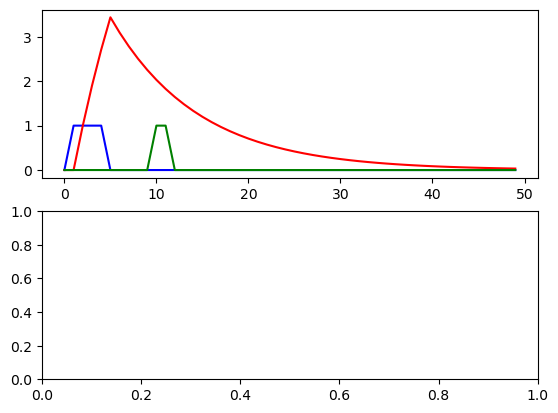

In [9]:
import numpy as np
import matplotlib.pyplot as plt

alpha=0.9 #eligibility constant
beta=0    #US trace constant - you don't need it when beta=0
c=0.1     #learning constant
w0=0.6         # US는 더이상 람다가 아니라 변하지 않는 weight다.
w1=0          # CS - 가소성 있음
n_trials=20
n_steps=50

US_param=[10,12]     
CS_param=[1,5]
ISI=CS_param[0]-US_param[0]

CS=np.zeros(50)
CS_E=np.zeros(50)
US=np.zeros(50)
Y=np.zeros(50)
Result_array=np.zeros(n_trials)


for i in range(CS_param[0],CS_param[1]): #50개의 time step 중 1~4 사이에서 1
    CS[i]=1
    
for i in range(US_param[0],US_param[1]): #50개의 time step 중 3~33 사이에서 1
    US[i]=1
    
for i in range(1,50):                   # CS가 eligibility를 가지고 처리됨
    CS_E[i]=alpha*CS_E[i-1]+CS[i-1]  

fig,axs=plt.subplots(2)
axs[0].plot(CS, color='blue') 
axs[0].plot(CS_E, color='red') 
axs[0].plot(US, color='green') 

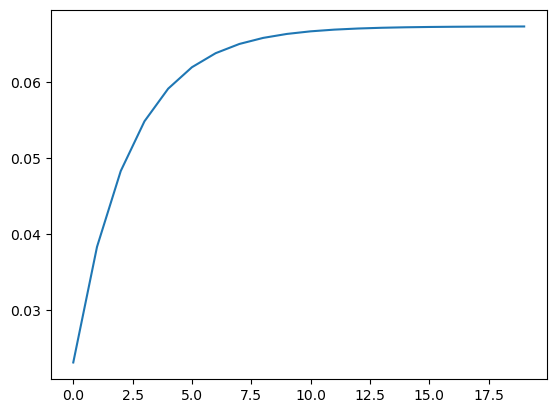

In [10]:
#Simple acquisition
for j in range(n_trials):
    for i in range(n_steps):
        Y[i]=CS[i]*w1+US[i]*w0        #CR이 y값으로써 존재
        if i>0:
            w1+=c*(Y[i]-Y[i-1])*CS_E[i]  # w1 업데이트
    Result_array[j]=w1
        
plt.plot(Result_array)

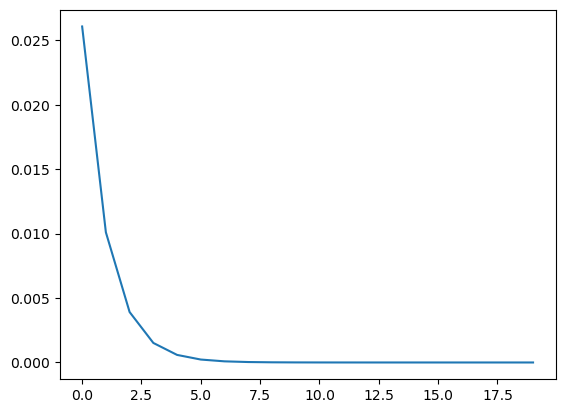

In [4]:
#Simple Extinction
for j in range(n_trials):
    for i in range(n_steps):
        Y[i]=CS[i]*w1
        if i>0:
            w1=w1+c*(Y[i]-Y[i-1])*CS_E[i]
    Result_array[j]=w1
        
plt.plot(Result_array)

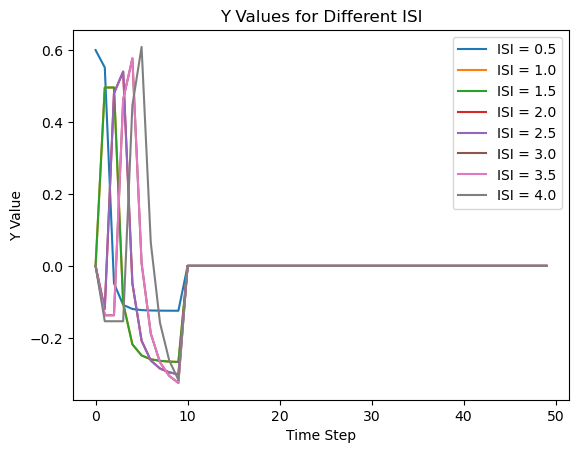

In [61]:
import numpy as np
import matplotlib.pyplot as plt

alpha=0.9 #eligibility constant
beta=0    #US trace constant - you don't need it when beta=0
c=0.1     #learning constant
w0=0.6         # US는 더이상 람다가 아니라 변하지 않는 weight다.
w1=0          # CS - 가소성 있음
n_trials=20
n_steps=50

CS_param = [1, 10]
ISI_values = np.arange(0.5, 4.5, 0.5)  # Different ISI values with 0.5 increments

CS = np.zeros(n_steps)
CS_E = np.zeros(n_steps)
US = np.zeros(n_steps)
Y_values = np.zeros((len(ISI_values), n_steps))
Result_array = np.zeros(n_trials)

for i in range(CS_param[0], CS_param[1]):  # Set CS values
    CS[i] = 1

for i in range(1, n_steps):  # Calculate CS eligibility
    CS_E[i] = alpha * CS_E[i-1] + CS[i-1]

for idx, ISI in enumerate(ISI_values):
    US_param = [int(ISI), int(ISI)+2]  # Varying US_param based on ISI (converted to integers)

    US = np.zeros(n_steps)
    for i in range(US_param[0], US_param[1]):  # Set US values based on ISI
        US[i] = 1

    for j in range(n_trials):
        for i in range(n_steps):
            Y_values[idx][i] = CS[i] * w1 + US[i] * w0  
            if i > 0:
                w1 += c * (Y_values[idx][i] - Y_values[idx][i-1]) * CS_E[i]  # Update w1
        Result_array[j] = w1


for idx, ISI in enumerate(ISI_values):
    plt.plot(Y_values[idx][:n_steps], label=f"ISI = {ISI}")
plt.xlabel('Time Step')
plt.ylabel('Y Value')
plt.title('Y Values for Different ISI')
plt.legend()
plt.show()



Data point 8개

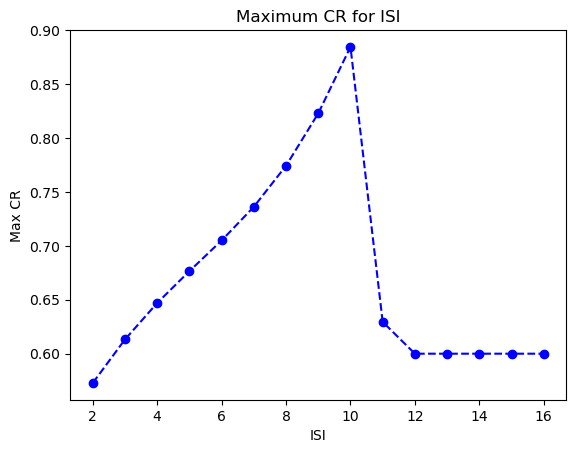

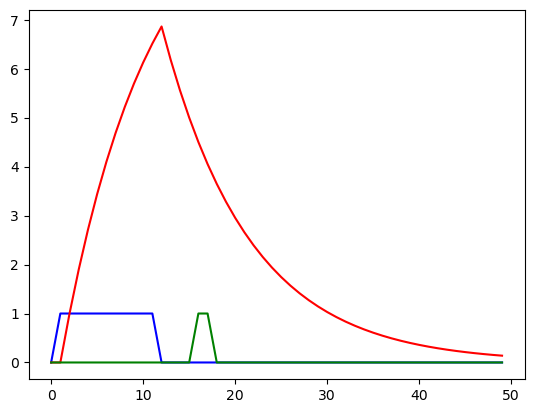

최적의 ISI는 10 이다


In [67]:
import numpy as np
import matplotlib.pyplot as plt

alpha=0.9 #eligibility constant
beta=0    #US trace constant - you don't need it when beta=0
c=0.1     #learning constant
w0=0.6         # US는 더이상 람다가 아니라 변하지 않는 weight다.
w1=0          # CS - 가소성 있음
n_trials=20
n_steps=50

CS_param = [1, 12]
ISI_values = np.arange(2, 17, 1)  #  ISI 1씩 증가

CS = np.zeros(n_steps)
CS_E = np.zeros(n_steps)
US = np.zeros(n_steps)
max_Y_values = np.zeros(len(ISI_values))

for i in range(CS_param[0], CS_param[1]):
    CS[i] = 1

for i in range(1, n_steps):  # CS eligibility
    CS_E[i] = alpha * CS_E[i-1] + CS[i-1]

for idx, ISI in enumerate(ISI_values): #index + value 받아오기
    US_param = [ISI, ISI + 2]  # US parameter = ISI ~ ISI+2

    US = np.zeros(n_steps)
    for i in range(int(US_param[0]), int(US_param[1])):  
        US[i] = 1

    Y_values = np.zeros(n_steps)
    for j in range(n_trials):
        for i in range(n_steps):
            Y_values[i] = CS[i] * w1 + US[i] * w0  # CR = Y값
            if i > 0:
                w1 += c * (Y_values[i] - Y_values[i-1]) * CS_E[i]  # Update w1
    max_Y_values[idx] = np.max(Y_values) # CR rate가 정확히 무엇인지 모르겠어서 MAX CR로 대체

# Plot X축 ISI, y축 CR 최대
plt.plot(ISI_values, max_Y_values, 'bo--')
plt.xlabel('ISI')
plt.ylabel('Max CR')
plt.title('Maximum CR for ISI')

plt.show()

max_CR_index = np.argmax(max_Y_values)  #index max CR 
max_CS = CS.copy()
max_US = np.zeros(n_steps)
max_CS_E = np.zeros(n_steps)

US_param = [ISI_values[max_CR_index], ISI_values[max_CR_index] + 2]  # maximum CR index -> US parameter

for i in range(int(US_param[0]), int(US_param[1])):
    max_US[i] = 1

for i in range(1, n_steps):  # CS eligibility 
    max_CS_E[i] = alpha * max_CS_E[i-1] + max_CS[i-1]


# plot 2
plt.plot(CS, color='blue') 
plt.plot(CS_E, color='red') 
plt.plot(US, color='green') 
plt.show()
print("최적의 ISI는",ISI_values[max_CR_index]-CS_param[0]+1,'이다')


Second order conditioning

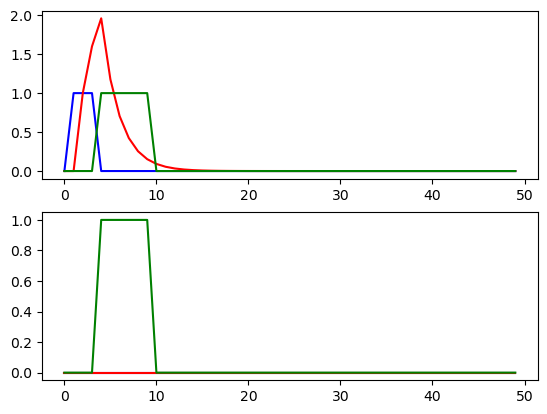

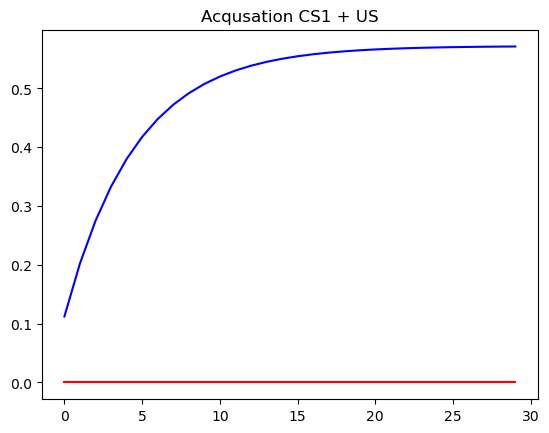

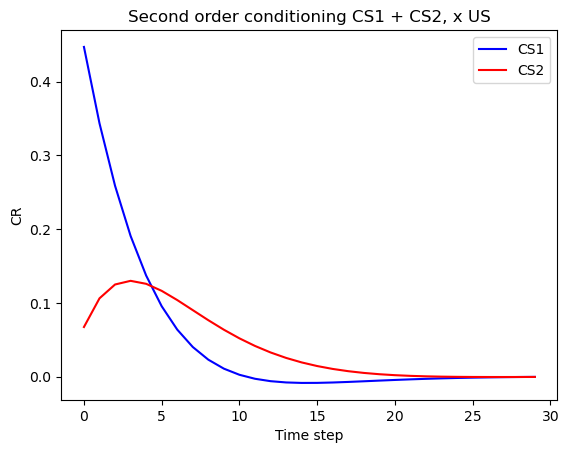

In [76]:
import numpy as np
import matplotlib.pyplot as plt

alpha=0.6 #eligibility constant
beta=0    #US trace constant - you don't need it when beta=0
c=0.1     #learning constant
w0=0.6
w1=[0,0]
n_trials=30
n_steps=50

US_param=[4,10]
CS_param=[1,4,0,0]                      #Stage 1: CS1 only
CS_param=np.reshape(CS_param, (2,2))

CS=np.zeros((len(CS_param),n_steps))
CS_E=np.zeros((len(CS_param),n_steps))
US=np.zeros(n_steps)
Y=np.zeros(n_steps)
Result_array=np.zeros((n_trials,len(CS_param)))

for j in range(len(CS_param)):
    for i in range(CS_param[j,0],CS_param[j,1]):
         CS[j,i]=1
    
for i in range(US_param[0],US_param[1]):
    US[i]=1
    
for j in range(len(CS_param)):
    for i in range(1,n_steps):
        CS_E[j,i]=alpha*CS_E[j,i-1]+CS[j,i-1]  

fig,axs=plt.subplots(2)
axs[0].plot(CS[0], color='blue') 
axs[0].plot(CS_E[0], color='red') 
axs[0].plot(US, color='green') 

axs[1].plot(CS[1], color='blue') 
axs[1].plot(CS_E[1], color='red') 
axs[1].plot(US, color='green') 
plt.show()



# Stage 1 acquisition  학습 CS1 + US
for j in range(n_trials):
    for i in range(n_steps):
        Y[i]=np.dot(CS.T[i],w1)+US[i]*w0
        if i>0:
            w1=w1+c*(Y[i]-Y[i-1])*CS_E.T[i]
    Result_array[j]=w1
        

plt.plot(Result_array.T[0], color='blue', label='CS1')
plt.plot(Result_array.T[1], color='red', label='CS2')
plt.title('Acqusation CS1 + US')
plt.show()


# Stage 2 present CS 1 $ CS2 witount US (w0=0)
w0=0
CS_param=[3,7,1,4]      #important! The order of the CS1 and CS2 must be reversed.                
CS_param=np.reshape(CS_param, (2,2))

CS=np.zeros((len(CS_param),n_steps))
CS_E=np.zeros((len(CS_param),n_steps))

Result_array=np.zeros((n_trials,len(CS_param)))

for j in range(len(CS_param)):
    for i in range(CS_param[j,0],CS_param[j,1]):
         CS[j,i]=1
    
for j in range(len(CS_param)):
    for i in range(1,n_steps):
        CS_E[j,i]=alpha*CS_E[j,i-1]+CS[j,i-1]  
        
for j in range(n_trials):
    for i in range(n_steps):
        Y[i]=np.dot(CS.T[i],w1)#US[i]*w0    #second order conditioning US 제거
        if i>0:
            w1=w1+c*(Y[i]-Y[i-1])*CS_E.T[i]
    Result_array[j]=w1
        
plt.plot(Result_array.T[0], color='blue', label='CS1')
plt.plot(Result_array.T[1], color='red', label='CS2')
plt.xlabel('Time step')
plt.ylabel('CR')
plt.title('Second order conditioning CS1 + CS2, x US')
plt.legend()
plt.show()